In [ ]:
!pip install huggingface_sb3 gym
!pip install pyvirtualdisplay

In [ ]:
#Встановлення необхідних бібліотек
from pyvirtualdisplay import Display
import gym
from huggingface_sb3 import load_from_hub
from stable_baselines3 import PPO
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import time

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


Перевірка роботи моделі RL ppo-LunarLander-v2 (ThomasSimonini) з https://huggingface.co/  (приземлення корабля)

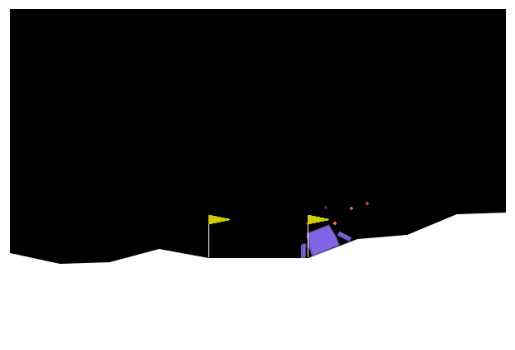

Апарат не приземлився успішно або розбився.


In [ ]:
# Створення віртуального дисплея
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

# Завантажуємо модель ppo-LunarLander-v2
checkpoint = load_from_hub(
    repo_id="ThomasSimonini/ppo-LunarLander-v2",
    filename="ppo-LunarLander-v2.zip"
)

# Завантажуємо модель в Stable Baselines3 для можливості подальшого використання в середовищі
model = PPO.load(checkpoint)

# Ініціалізуємо середовище LunarLander-v2
env = gym.make("LunarLander-v2")

# Скидаємо середовище, визначаючи початкове положення
obs = env.reset()
done = False #індикатор досягнення землі (завершення циклу приземлення корабля)

# Тестуємо модель в середовищі
while not done:
    # Прогнозування дії для поточного спостереження (для даної моделі достатньо лише значення дії)
    action, _ = model.predict(obs)

    # Виконуємо дію в середовищі, визначаючи новий стан середовища
    obs, reward, done, info = env.step(action)
    print(obs, reward, done, info)

    # Отримуємо зображення з гри
    img = env.render(mode='rgb_array')

    # Очищаємо попереднє виведення
    clear_output(wait=True)

    # Відображаємо зображення через matplotlib
    plt.imshow(img)
    plt.axis('off')  # Відключаємо осі
    plt.show()

    # Перевіряємо, чи гра завершена, якщо так, то виводимо результат приземлення
    if done:
        if reward >=0:
            print("Приземлення успішне!")
        else:
            print("Апарат не приземлився успішно або розбився.")


# Закриваємо середовище після тестування
env.close()


Було продемонстровано процес тестування натренованої моделі в середовищі, де модель робить прогнози для кожного кроку в гру, а результат візуалізується у вигляді зображень, що змінюються після кожної дії. Це дозволяє побачити, як модель приймає рішення і як агент (літальний апарат) рухається в реальному часі. По результатах тестування: модель вартує дотренувати, враховуючи середовище, наближене до даного.

Це по суті є демонстрація того, як агент, навчившись на попередніх іграх, застосовує свої знання для прийняття рішень у новій ситуації (у новій грі).